In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
import matplotlib as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Datas.csv")

In [3]:
df.shape

(1386, 31)

In [4]:
print(df.columns)

Index(['Report Year', 'Model Year', 'Mileage', 'Street', 'Parking Lot',
       'Highway / Freeway', 'Intersection', 'Roadway(0 is dry) Surface',
       'Posted Speed Limit (MPH)',
       'Daylight(Daylight3, Dawn'dusk2, dark-light1, dark-not light+J8270)',
       'Weather - Clear', 'Weather - Snow', 'Weather - Cloud1',
       'Weather - Fog/Smoke', 'Weather - Rain', 'Weather - Severe Wind',
       'Weather - Unknown', 'Weather - Thunder', 'Passenger Car',
       'Non-Motorist: Cyclist', 'Heavy Truck', 'SUV', 'Animal', 'Van',
       'Pickup Truck', 'No Injuries Reported', 'Minor', 'Moderate', 'Serious',
       'Property Damage?', 'Severity'],
      dtype='object')


In [5]:
df.head()

,Report Year,Model Year,Mileage,Street,Parking Lot,Highway / Freeway,Intersection,Roadway(0 is dry) Surface,Posted Speed Limit (MPH),"Daylight(Daylight3, Dawn'dusk2, dark-light1, dark-not light+J8270)",...,SUV,Animal,Van,Pickup Truck,No Injuries Reported,Minor,Moderate,Serious,Property Damage?,Severity
0,0,2024,6527,0,0,0,1,0,45,3,...,0,0,0,0,0,0,1,0,1,3
1,0,2021,83212,0,0,0,1,0,25,1,...,0,0,0,0,1,0,0,0,1,1
2,0,2024,2573,1,0,0,0,0,20,1,...,0,0,0,0,1,0,0,0,1,1
3,2024,2021,137012,1,0,0,0,0,40,3,...,0,0,0,0,1,0,0,0,1,1
4,2024,2024,22225,1,0,0,0,0,20,1,...,0,0,0,0,1,0,0,0,1,1


In [6]:
df.columns

Index(['Report Year', 'Model Year', 'Mileage', 'Street', 'Parking Lot',
       'Highway / Freeway', 'Intersection', 'Roadway(0 is dry) Surface',
       'Posted Speed Limit (MPH)',
       'Daylight(Daylight3, Dawn'dusk2, dark-light1, dark-not light+J8270)',
       'Weather - Clear', 'Weather - Snow', 'Weather - Cloud1',
       'Weather - Fog/Smoke', 'Weather - Rain', 'Weather - Severe Wind',
       'Weather - Unknown', 'Weather - Thunder', 'Passenger Car',
       'Non-Motorist: Cyclist', 'Heavy Truck', 'SUV', 'Animal', 'Van',
       'Pickup Truck', 'No Injuries Reported', 'Minor', 'Moderate', 'Serious',
       'Property Damage?', 'Severity'],
      dtype='object')

In [7]:
mean_report_year = df["Report Year"][df["Report Year"]!=0].mean()
df["Report Year"] = df["Report Year"].replace(0,mean_report_year)

In [8]:
Predictors_df = df[["Model Year", "Mileage", "Street", "Parking Lot", "Highway / Freeway","Intersection", "Roadway(0 is dry) Surface","Posted Speed Limit (MPH)","Daylight(Daylight3, Dawn'dusk2, dark-light1, dark-not light+J8270)","Weather - Clear","Weather - Snow", "Weather - Cloud1","Weather - Fog/Smoke", "Weather - Rain", "Weather - Severe Wind", "Weather - Unknown", "Weather - Thunder", "Passenger Car", "Non-Motorist: Cyclist", "Heavy Truck", "SUV", "Animal", "Van", "Pickup Truck", "Severity" ]]
Predictors_df = Predictors_df.map(pd.to_numeric, errors='coerce')
Predictors_df = Predictors_df[Predictors_df.map(lambda x: isinstance(x, int))]

In [9]:
#corr = Predictors_df.corr(method = "spearman")
#fig, ax = plt.subplots()
#fig.set_size_inches(11, 7)
#sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [10]:
excludeColumns = ("Model Year", "No Injuries Reported", "Minor", "Moderate", "Serious", "Severity")
predictors = [s for s in Predictors_df.columns if s not in excludeColumns]
X = Predictors_df[predictors]
y = Predictors_df["Severity"]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2,
    random_state=1)

In [12]:
regr = LinearRegression()
regr.fit(train_X, train_y)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': regr.coef_}))
RegressionSummary(train_y, regr.predict(train_X))

                                            Predictor   coefficient
0                                             Mileage  1.979093e-07
1                                              Street -6.255782e-01
2                                         Parking Lot -7.880839e-01
3                                   Highway / Freeway -7.457820e-01
4                                        Intersection -6.109090e-01
5                           Roadway(0 is dry) Surface  3.040974e-02
6                            Posted Speed Limit (MPH)  3.977576e-04
7   Daylight(Daylight3, Dawn'dusk2, dark-light1, d... -1.981215e-02
8                                     Weather - Clear  7.030798e-01
9                                      Weather - Snow -4.440892e-16
10                                   Weather - Cloud1  5.774818e-01
11                                Weather - Fog/Smoke -6.383782e-16
12                                     Weather - Rain  4.593445e-01
13                              Weather - Severe

NameError: name 'RegressionSummary' is not defined

In [13]:
excludeColumns = ("Model Year", "No Injuries Reported", "Minor", "Moderate", "Serious", "Severity")
predictors = [s for s in Predictors_df.columns if s not in excludeColumns]
x = Predictors_df[predictors]
y = Predictors_df["Severity"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [15]:
y.value_counts()

Severity
1    1127
2     128
0      74
3      40
4      17
Name: count, dtype: int64

In [17]:
model = LogisticRegression(max_iter=5000) #imbalance the data //random forest
model.fit(X_train_scaled,y_train)        #scale the data.   called StandardS

LogisticRegression(max_iter=5000)

In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
accuracy_score(y_test,y_pred)

0.7769784172661871

In [21]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  2,  14,   0,   0,   0],
       [  0, 214,   0,   0,   0],
       [  0,  28,   0,   0,   0],
       [  0,  14,   0,   0,   0],
       [  0,   6,   0,   0,   0]])

In [22]:
pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


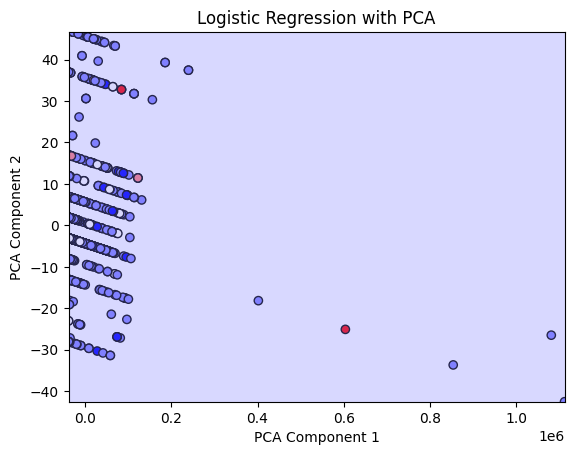

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

# Train logistic regression on the reduced data
model = LogisticRegression()
model.fit(X_pca, y_train)

# Scatter plot of data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o')

# Create a grid of points for decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

# Labels and title
plt.title('Logistic Regression with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


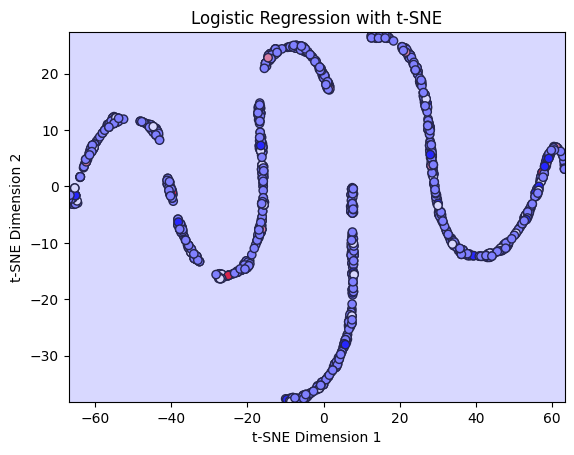

In [25]:
from sklearn.manifold import TSNE

# Reduce data to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x_train)

# Train logistic regression on the reduced data
model = LogisticRegression()
model.fit(X_tsne, y_train)

# Scatter plot of data points
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o')

# Create a grid of points for decision boundary
xx, yy = np.meshgrid(np.linspace(X_tsne[:, 0].min(), X_tsne[:, 0].max(), 100),
                     np.linspace(X_tsne[:, 1].min(), X_tsne[:, 1].max(), 100))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

# Labels and title
plt.title('Logistic Regression with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
